In [1]:
import os
if 'COLAB_GPU' in os.environ:
  print("GPU IS ENABLED!")
else:
  print("GPU IS NOT ENABLED!")

!nvidia-smi


GPU IS ENABLED!
Mon Jan 13 08:52:26 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+---------


**INSTALL YOLO-8 Model**

In [2]:
!pip install ultralytics==8.0.20

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.2/261.2 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 49.4 MB/s eta 0:00:00


**Check If YOLO-8 has been installed properly or not**

In [3]:
import ultralytics

ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.6/112.6 GB disk)


**Import Dataset from Roboflow**

In [4]:
%pwd

'/content'

In [5]:
!mkdir RoadSignDetection

In [6]:
!ls

RoadSignDetection


In [7]:
path = "/content/RoadSignDetection"


In [8]:
%pwd

'/content'

In [9]:
os.chdir("/content/RoadSignDetection")

In [11]:
%pwd

'/content/RoadSignDetection'

In [14]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="JglmiERxBBYXFkqbPHzb")
project = rf.workspace("selfdriving-car-qtywx").project("self-driving-cars-lfjou")
version = project.version(2)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Self-Driving-Cars-2 in yolov8:: 100%|██████████| 8966/8966 [00:01<00:00, 8311.26it/s]


**Training The YOLOv8 Over A Custom Dataset**

In [23]:
!yolo task=detect mode=train model=yolov8n.pt data=/content/RoadSignDetection/Self-Driving-Cars-2/data.yaml epochs=10 imgsz=640 batch=16

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:332: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu')  # load
Ultral

**Display Some Of The Content We Obtained**

In [28]:

!ls '/content/RoadSignDetection/runs/detect/train7/'

args.yaml					    F1_curve.png  R_curve.png  weights
confusion_matrix.png				    P_curve.png   results.csv
events.out.tfevents.1736760112.ec42381c71d0.8018.0  PR_curve.png  results.png


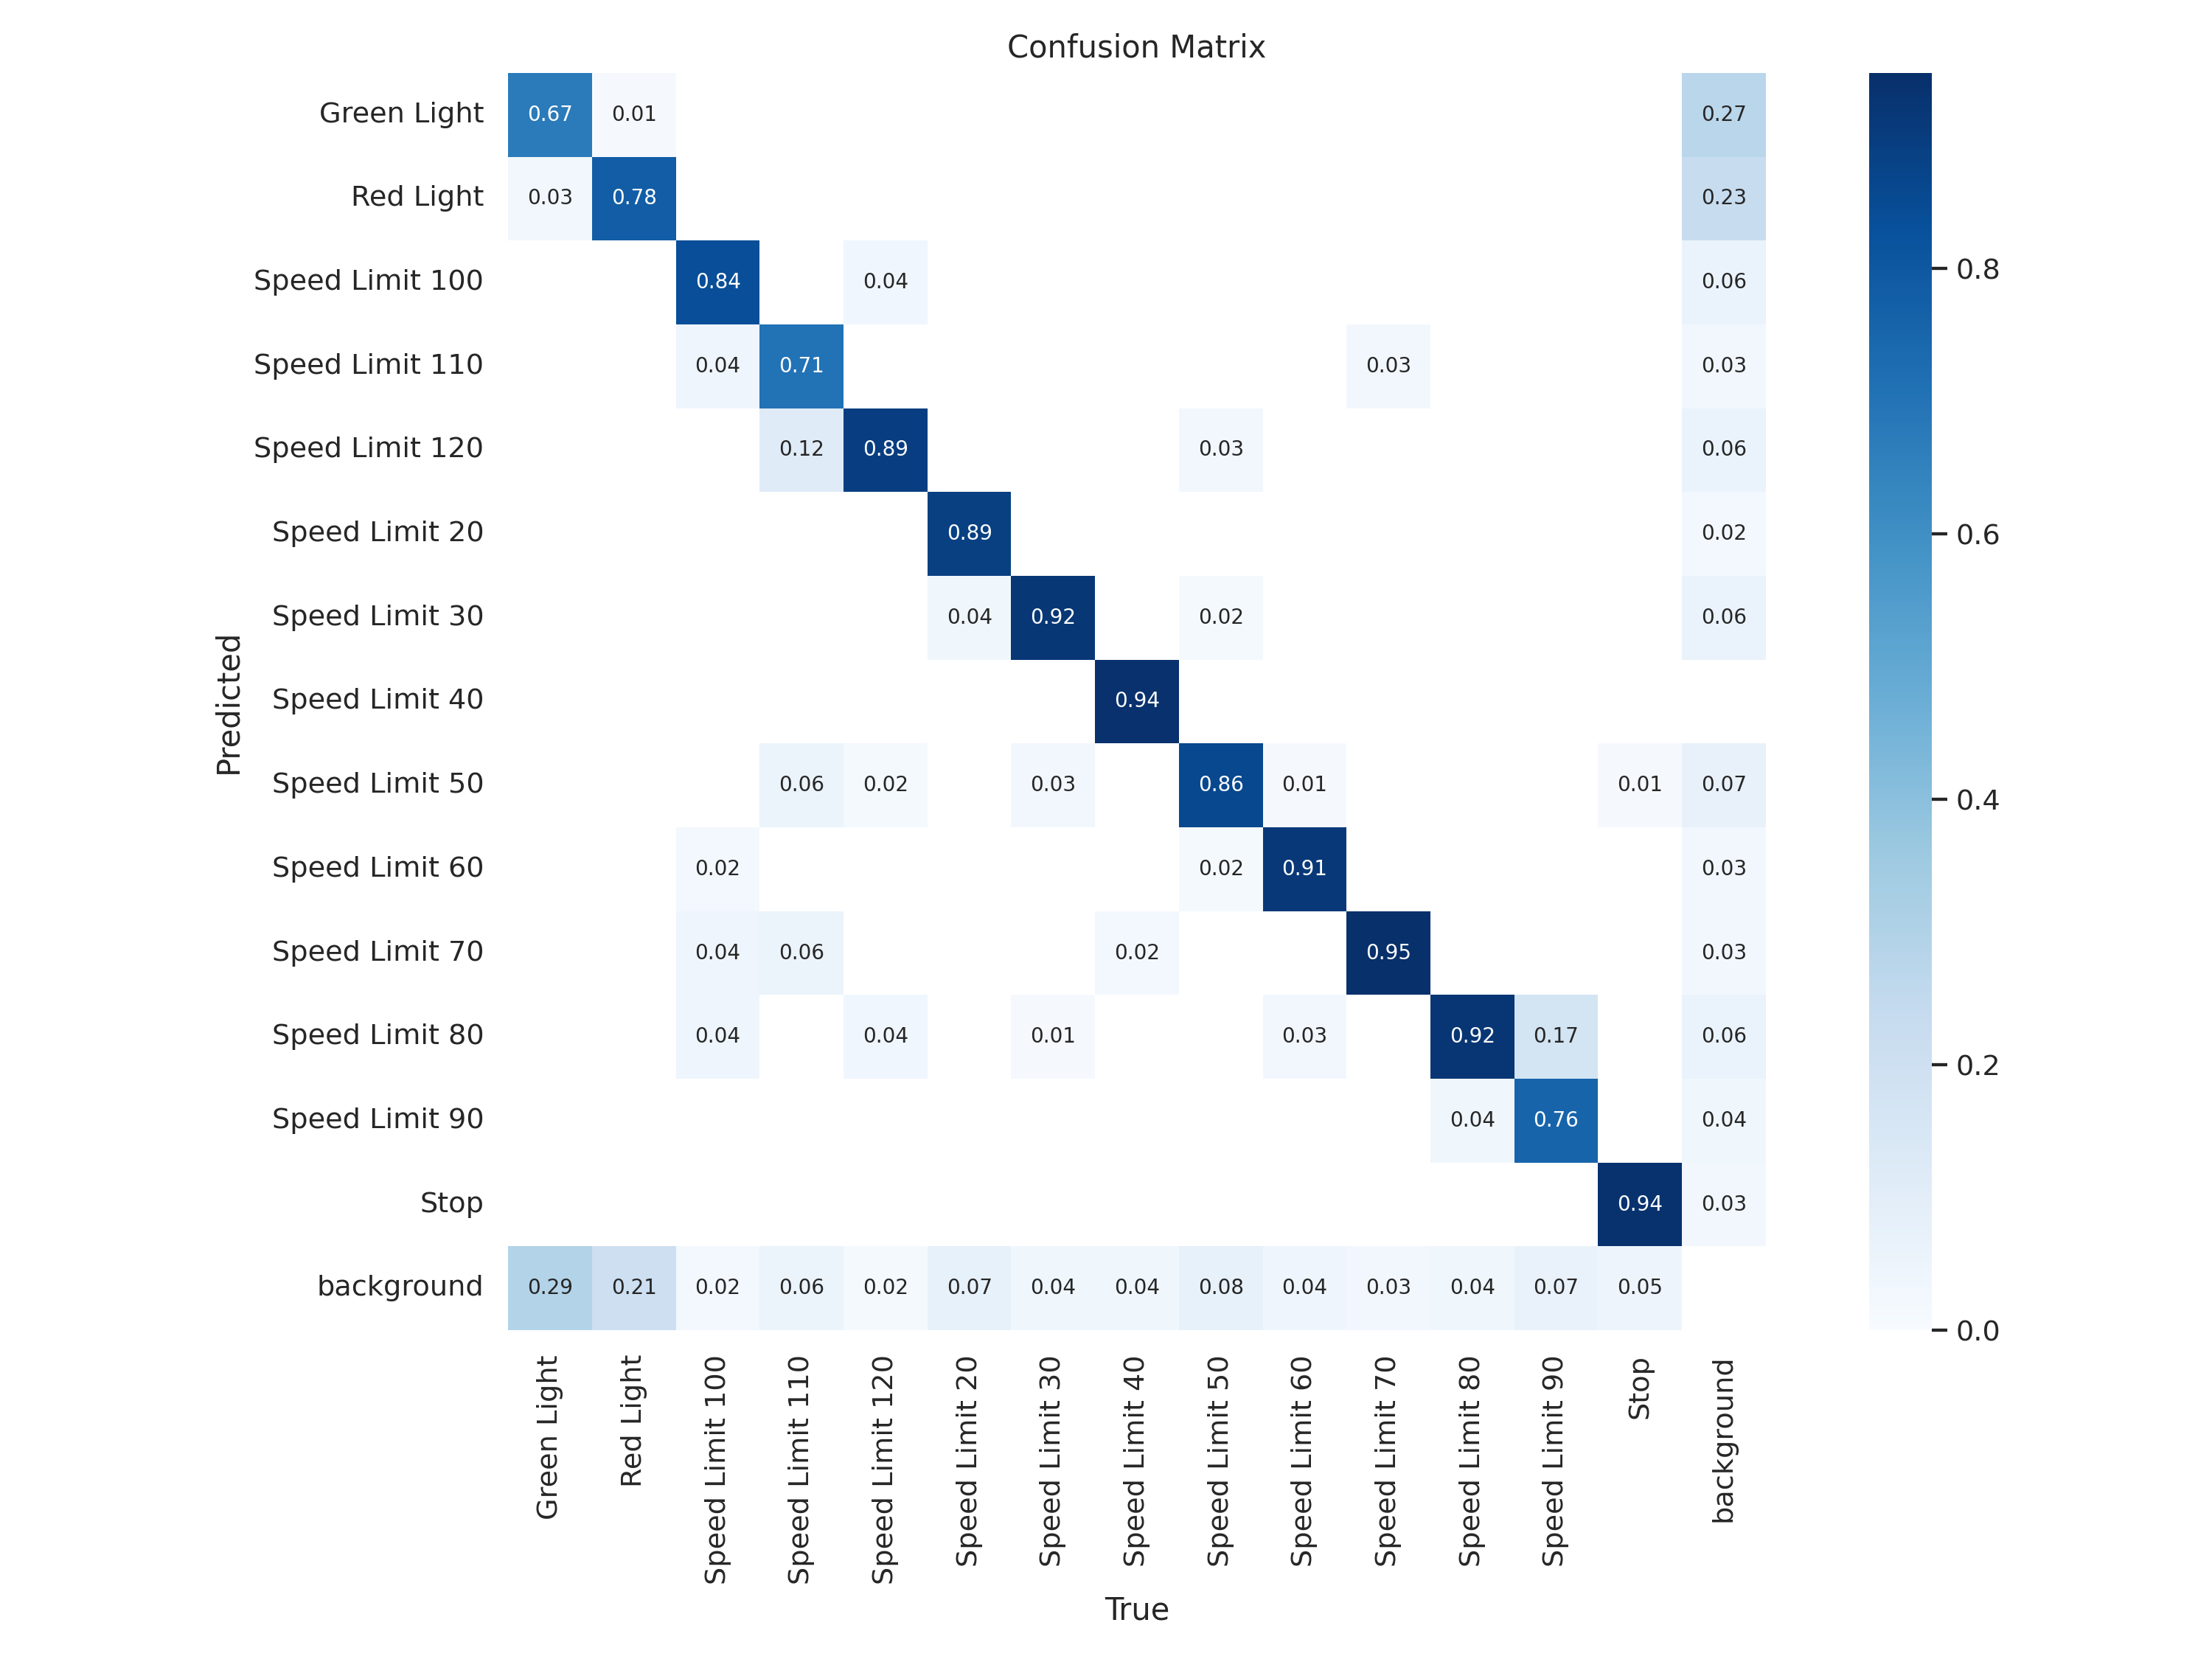

In [35]:
resultData = "/content/RoadSignDetection/runs/detect/train7/"
from IPython.display import Image
Image(filename=f"{resultData}confusion_matrix.png")

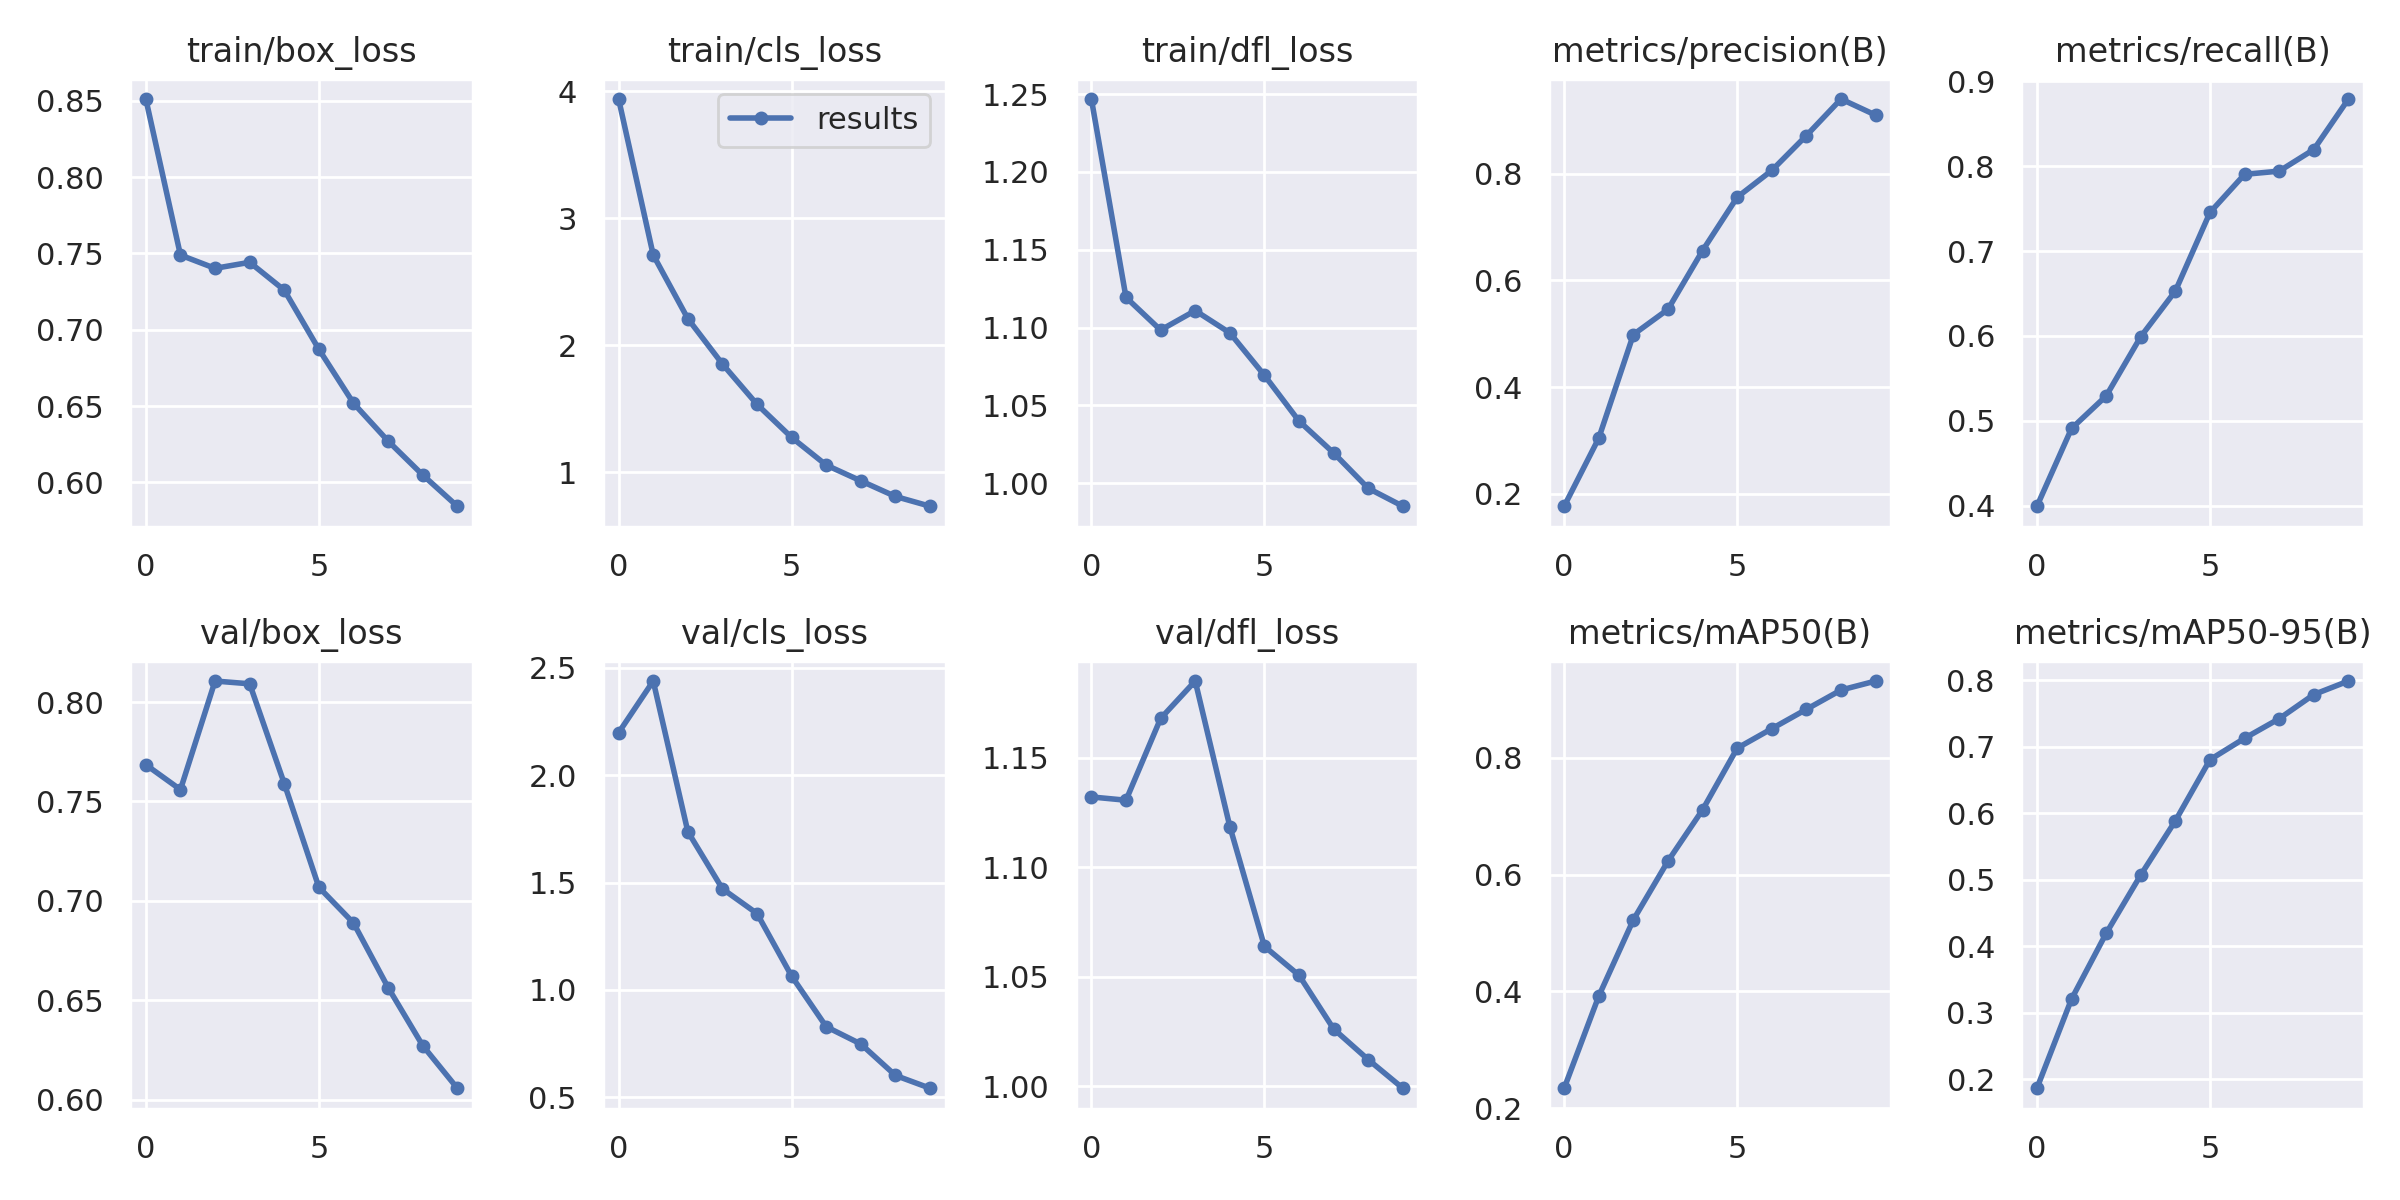

In [37]:
Image(filename=f"{resultData}results.png")

In [43]:
import pandas as pd

df = pd.read_csv(f"{resultData}results.csv")
print(df.head(10))

                  epoch        train/box_loss        train/cls_loss  \
0                     0               0.85119               3.93980   
1                     1               0.74892               2.71120   
2                     2               0.74024               2.20940   
3                     3               0.74419               1.85190   
4                     4               0.72595               1.53400   
5                     5               0.68716               1.27330   
6                     6               0.65184               1.05560   
7                     7               0.62705               0.93117   
8                     8               0.60483               0.80837   
9                     9               0.58433               0.73143   

         train/dfl_loss  metrics/precision(B)  ...          val/cls_loss  \
0               1.24690               0.17654  ...               2.19760   
1               1.11940               0.30421  ...               2

**Test your model on any arbitary video containing road signs**

In [44]:
%pwd


'/content/RoadSignDetection'

In [46]:
os.chdir("/content")

In [47]:
%pwd

'/content'

In [48]:

!mkdir ManualTestingData

In [49]:
os.chdir("/content/ManualTestingData")

In [50]:


%pwd

'/content/ManualTestingData'

In [64]:
!pip install yt-dlp
from yt_dlp import YoutubeDL

youtube_url = "https://www.youtube.com/watch?v=zDNYSZ1vfpc"
output_path = "/content/ManualTestingData/InputVideo1.mp4"

# Configure yt-dlp
ydl_opts = {
    'format': 'best',
    'outtmpl': output_path
}

# Download the video
with YoutubeDL(ydl_opts) as ydl:
    ydl.download([youtube_url])

print(f"Video downloaded to {output_path}")


[youtube] Extracting URL: https://www.youtube.com/watch?v=zDNYSZ1vfpc
[youtube] zDNYSZ1vfpc: Downloading webpage
[youtube] zDNYSZ1vfpc: Downloading ios player API JSON
[youtube] zDNYSZ1vfpc: Downloading tv player API JSON
[youtube] zDNYSZ1vfpc: Downloading m3u8 information
[info] zDNYSZ1vfpc: Downloading 1 format(s): 18
[download] Destination: /content/ManualTestingData/InputVideo1.mp4
[download] 100% of    6.20MiB in 00:00:00 at 14.40MiB/s  
Video downloaded to /content/ManualTestingData/InputVideo1.mp4


In [65]:
weightsPath="/content/RoadSignDetection/runs/detect/train7/weights"

!yolo task=detect mode=predict model={weightsPath}/best.pt conf=.25 source='/content/ManualTestingData/InputVideo1.mp4' save=True


/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:332: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu')  # load
2025-0

**Downalod The Predicted Output**

In [66]:
from google.colab import files

files.download('/content/ManualTestingData/runs/detect/predict3/InputVideo1.mp4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>